(118, 45)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


<IPython.core.display.Javascript object>


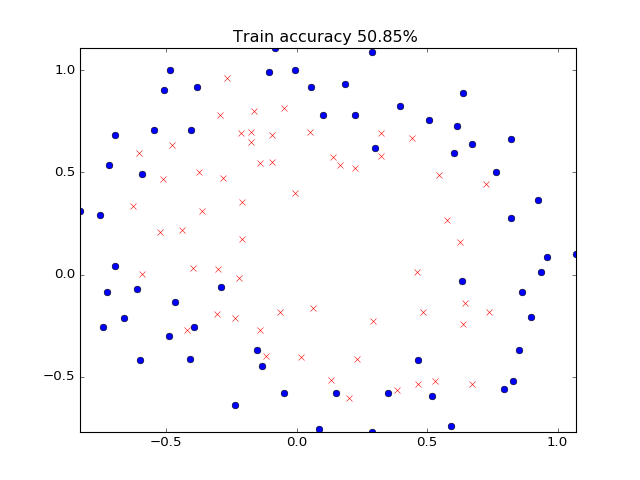

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from gradientDescent import gradientDescent

def sigmoid(z):
	return 1 / (1 + np.exp(-z))

data = np.loadtxt('logistic2.txt', delimiter = ',')
X = data[:, 0:2]
y = data[:, 2]

poly = PolynomialFeatures(8)
x_polynomial = poly.fit_transform(X)

print(x_polynomial.shape)
num_iters = 10000
alpha = 10
theta = np.zeros(x_polynomial.shape[1])
theta = gradientDescent(x_polynomial, y, theta, alpha, num_iters)
print(theta)

# accuracy on training set
h = np.round(sigmoid(x_polynomial.dot(theta)))
accuracy = np.mean(np.where(h == y.T,1,0)) * 100

plt.plot(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], 'rx')
plt.plot(X[np.where(y == 0)[0], 0], X[np.where(y == 0)[0], 1], 'bo')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
plt.title('Train accuracy {}% '.format(np.round(accuracy, decimals=2)))
plt.show()